# Clustering

This file contains the different cluster methods.

In [1]:
from Surrogate_data import Surrogate_data

In [ ]:
evaluate = Surrogate_data()

# Table of Contents

1. [Introduction & Motivation](#intro)
2. [What is that Clustering everybody keeps on talkin' about?](#cluster)
3. [Performance Metric - Silhouette Score](#perfom)
4. [Surrogate Data & Yannik's Class](#class)
5. [Clustering Algorithms](#algos)<br>
    5.1 [Partion](#partition)<br>
      5.1.1 [K-Means](#kmeans) (Skyler)<br>
      5.1.2 [Spectral Clustering](#spectral) (Sebastian) <br>
    5.2 Hierarchical
        5.2.1 Agglomerative Clustering (Sebastian/ Skyler)
        5.2.2 BIRCH Clustering (Sebastian)
    5.3 Density-Based (Debasmita)
        5.3.1 HDBSCAN
        5.3.2 DBSCAN
    5.4 Expectation Maximization (Yannik)
    5.5 Affinity Propagation (Debasmita)

# 1. Introduction & Motivation <a name="intro"/>

- Where do we come from? 
- Why are we doing this? 
- What are our limitations? 
- What is within our scope and what not?

# 2. What is that Clustering everybody keeps on talkin' about? <a name="cluster"/>

- Supervised vs. Unsupervised
- High level description of Clustering
- What is the difference between classification and clustering?

# 3. Performance Metric - Silhouette Score <a name="perfom"/>

# 4. Surrogate Data & Yannik's Class <a name="class"/>

# 5. Clustering Algorithms <a name="algos"/>

## 5.1. Partition <a name="partition"/>

### 5.1.1. K-Means <a name="kmeans"/>

### 5.1.2 Spectral Clustering <a name="spectral"/>

# Expectation Maximization for Clustering

The Expectation Maximization algorithm (EM) is an Maximum Likelihood Estimator (MLE) (for a closer examination of the relationship between MLE, MAP and EM see [1]). Hence, it assume a Gaussian normal distribution of the data. The core idea of the EM is to iteratively approximate the latent values, viz. those values which are not given. Doing so, it is guranteed to converge to, at least a local, minimum.

We can make use of the `GaussianMixture` function from `sklearn` which implemented the EM algorithm.

In [2]:
from sklearn.mixture import GaussianMixture

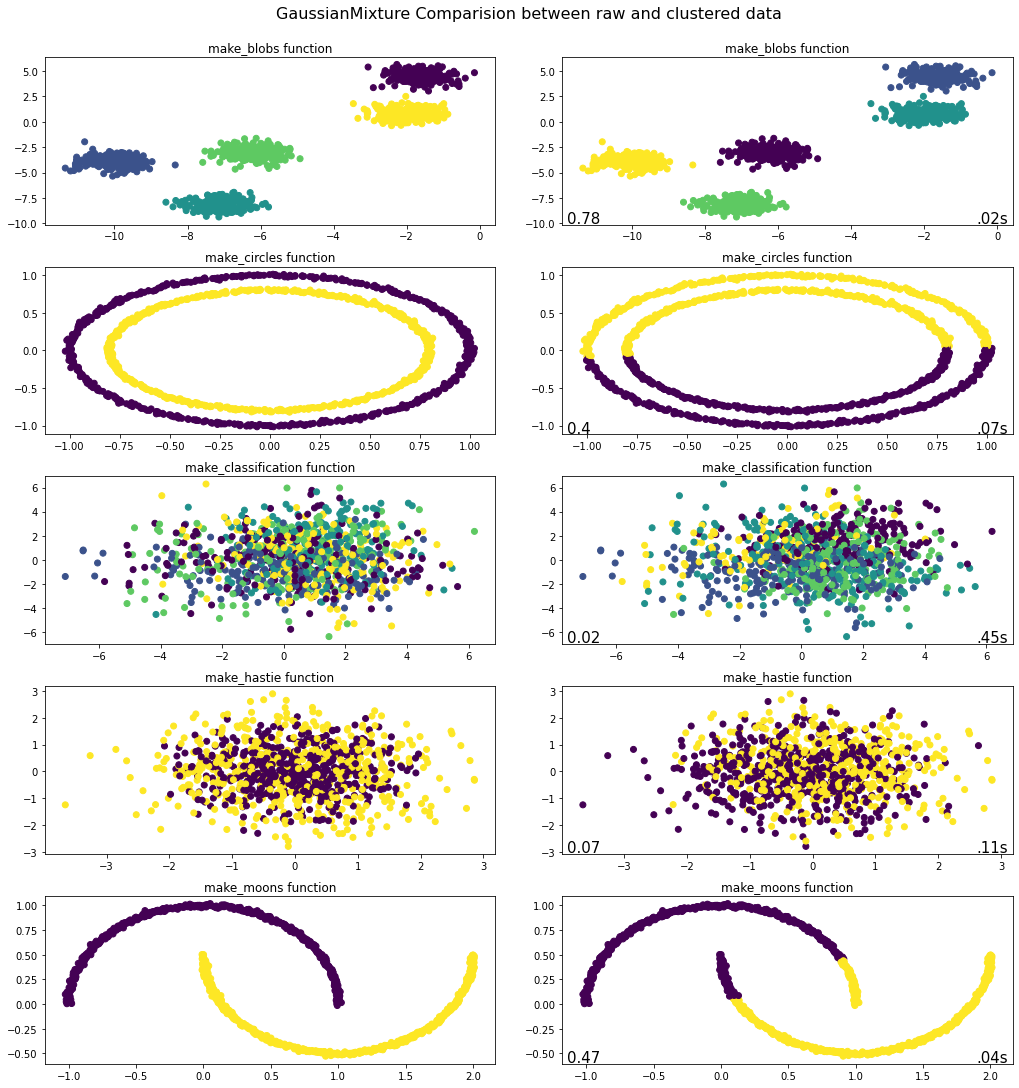

In [4]:
evaluate.plot_raw_vs_predict(GaussianMixture, init_params='kmeans', max_iter = 100)

# DBSCAN

In [8]:
from sklearn.cluster import DBSCAN

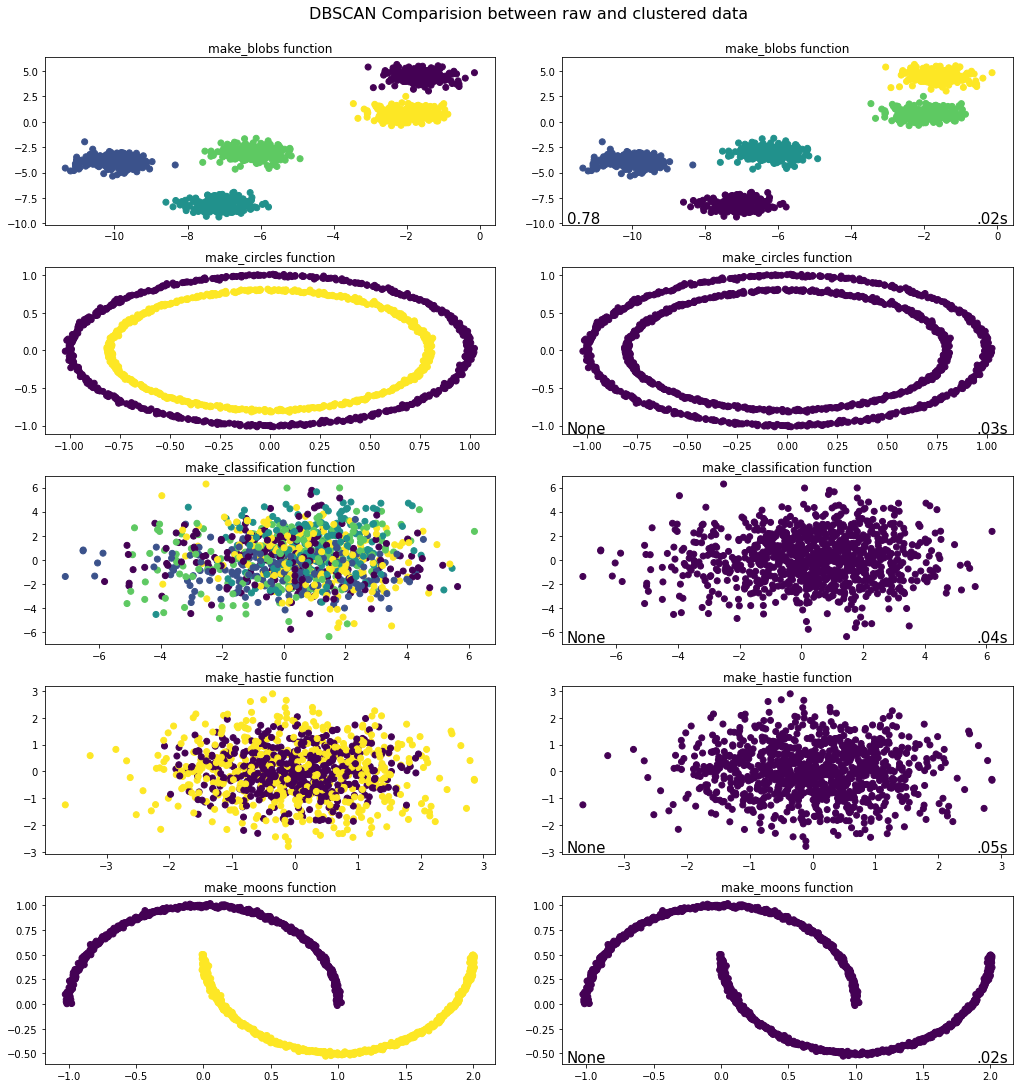

In [11]:
evaluate.plot_raw_vs_predict(DBSCAN, eps = 0.8)

# HDBSCAN

In [3]:
import hdbscan

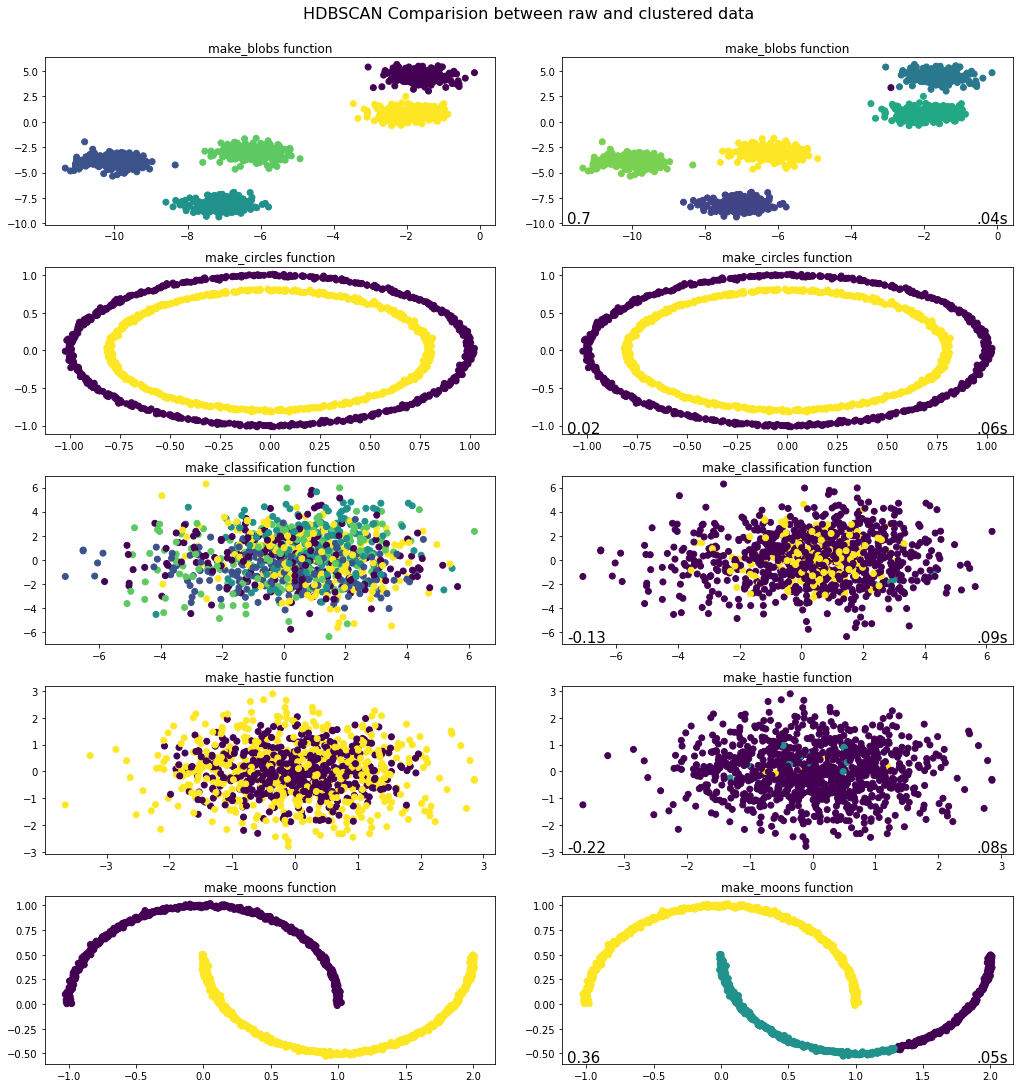

In [4]:
evaluate.plot_raw_vs_predict(hdbscan.HDBSCAN)

In [5]:
from sklearn.cluster import KMeans

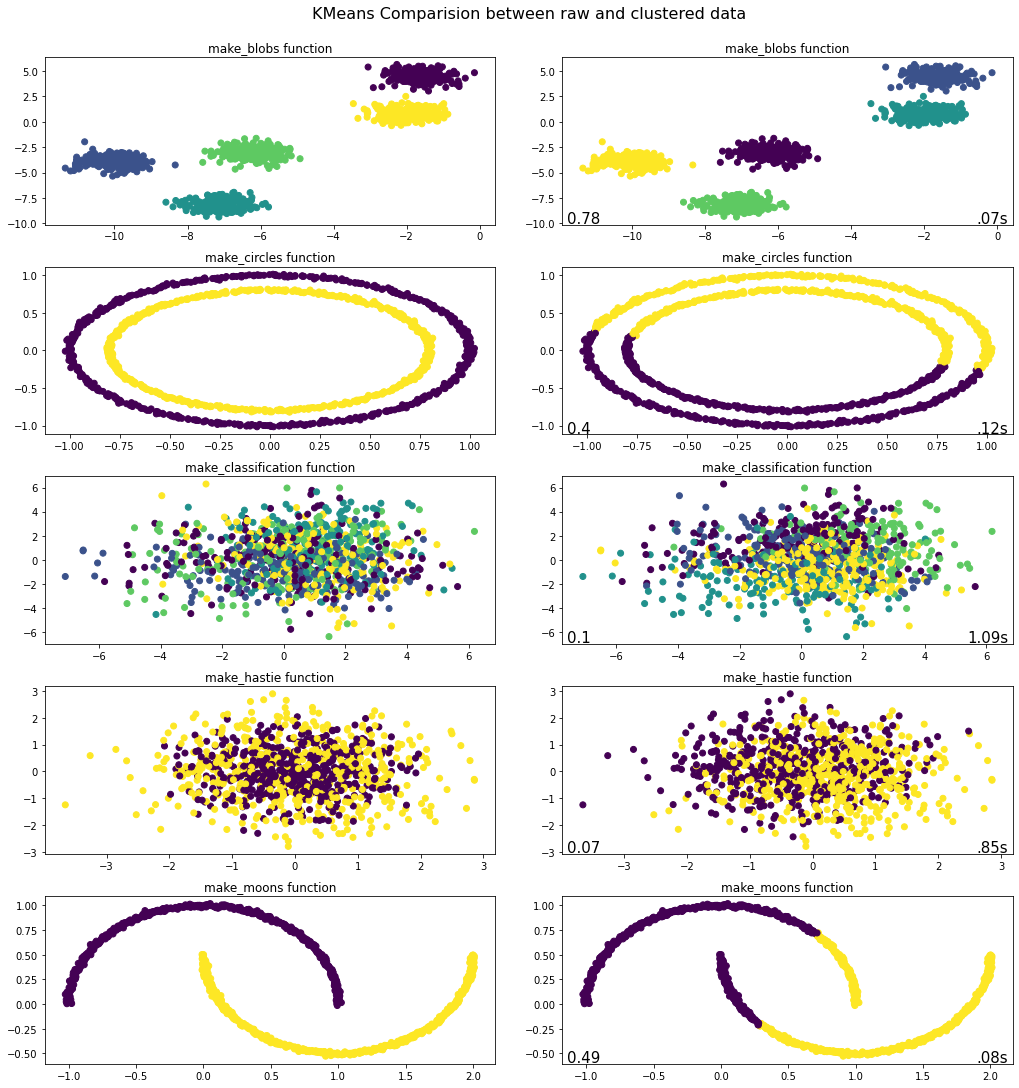

In [6]:
evaluate.plot_raw_vs_predict(KMeans)

# Bibliography

[1] https://stats.stackexchange.com/questions/235070/relation-between-map-em-and-mle/524802#524802

*Note: An exhaustive blogpost which explains MLE, MAP and EM and their relationship.*